# KNN

In [1]:
import importlib.machinery

loader = importlib.machinery.SourceFileLoader("data_import", "../../utils/data_import.py")
data_import = loader.load_module()

loader = importlib.machinery.SourceFileLoader("model_evaluator", "../../utils/model_evaluator.py")
model_evaluator = loader.load_module()

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import model_evaluator
import data_import
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data from Contagio dataset
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test('Contagio')

## Testing *k*

Using `grid_search_kfold_cv()` function to find the best possible value for parameter *k*

In [3]:
kfold_scores = model_evaluator.grid_search_kfold_cv(model=KNeighborsClassifier(), X=X_train, y=y_train, k=5, params_grid={'n_neighbors':[1,2,3,4,5,6,7,8]})
print(kfold_scores.best_params_)

{'n_neighbors': 1}


In [4]:
knn_metrics = model_evaluator.kfold_metrics(kfold_scores.best_estimator_, X_test, y_test)
print("fnr: ",knn_metrics['false_neg'])
print("acc: ",knn_metrics['accuracy_score'])

fnr:  0.0036036036036036037
acc:  0.9967837704106878


Printing `accuracy` and `false negative rate` on *trainig set* for different *k*

In [5]:
df_results = pd.DataFrame({'n_neighbors': [p['n_neighbors'] for p in kfold_scores.cv_results_['params']],
                           'accuracy': kfold_scores.cv_results_['mean_test_accuracy'],
                           'fnr': -kfold_scores.cv_results_['mean_test_fnr']})

Text(0.5, 0, 'K')

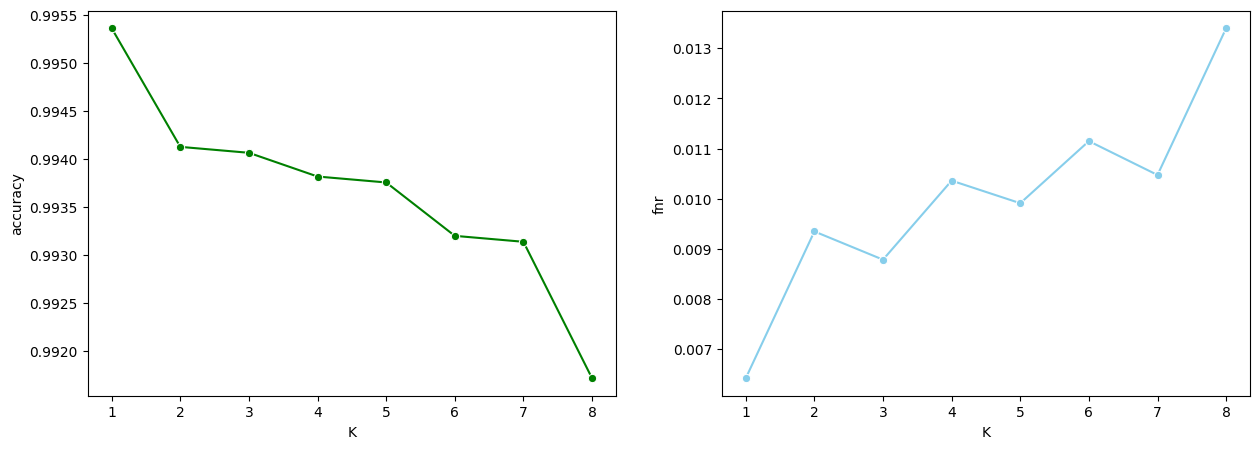

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
g_acc_2 = sns.lineplot(ax=axes[0], data=df_results, x='n_neighbors', y='accuracy', marker="o", legend=True, color='green')
g_fnr_2 = sns.lineplot(ax=axes[1], data=df_results, x='n_neighbors', y='fnr', marker="o", legend=True, color='skyblue')
axes[0].set_xlabel("K")
axes[1].set_xlabel("K")

## Final Testing

In [7]:
knn_test = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
knn_metrics = model_evaluator.kfold_metrics(knn_test, X_test, y_test)

print('## Performance on Test test for KNN (K=1) ##')
print("fnr: ",knn_metrics['false_neg'])
print("acc: ",knn_metrics['accuracy_score'])

## Performance on Test test for KNN (K=1) ##
fnr:  0.0036036036036036037
acc:  0.9967837704106878
